In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


sns.set_style('whitegrid')
color_palette = sns.color_palette("muted")
sns.set_palette(color_palette)

def create_fig(figsize=(8,5), dpi=150):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    return fig

In [2]:
df = pd.read_csv('./data/train_V2.csv')
df.shape

(4446966, 29)

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## เลือกเฉพาะ Solo FPP

Solo ไม่มี DBNOs กับ revives

In [4]:
df = df[df['matchType'] == 'solo-fpp']
df.drop(labels=['DBNOs', 'revives'], axis=1, inplace=True)
df.shape

(536762, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536762 entries, 4 to 4446965
Data columns (total 27 columns):
Id                 536762 non-null object
groupId            536762 non-null object
matchId            536762 non-null object
assists            536762 non-null int64
boosts             536762 non-null int64
damageDealt        536762 non-null float64
headshotKills      536762 non-null int64
heals              536762 non-null int64
killPlace          536762 non-null int64
killPoints         536762 non-null int64
kills              536762 non-null int64
killStreaks        536762 non-null int64
longestKill        536762 non-null float64
matchDuration      536762 non-null int64
matchType          536762 non-null object
maxPlace           536762 non-null int64
numGroups          536762 non-null int64
rankPoints         536762 non-null int64
rideDistance       536762 non-null float64
roadKills          536762 non-null int64
swimDistance       536762 non-null float64
teamKills      

# ...
# Cleaning & drop outlier, anomaly
# ...

## ตรวจค่า NaN

In [6]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(536761, 27)

## Descritive stats

In [8]:
df.iloc[:, 0:15].describe()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration
count,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000
mean,0.057640,1.058980,118.918804,0.251553,1.009678,48.025596,460.651884,0.934731,0.482457,21.701100,1577.081990
std,0.245489,1.791553,158.345782,0.633480,2.383454,27.579939,606.861920,1.495987,0.556407,45.716959,249.372334
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1044.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1377.000000
50%,0.000000,0.000000,75.790000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,1439.000000
75%,0.000000,2.000000,171.000000,0.000000,1.000000,72.000000,1120.000000,1.000000,1.000000,22.060000,1854.000000
max,5.000000,28.000000,2305.000000,16.000000,63.000000,100.000000,1970.000000,23.000000,5.000000,940.100000,2199.000000


In [9]:
df.iloc[:, 15:].describe()

,maxPlace,numGroups,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000
mean,95.051192,92.696308,963.338642,403.209692,0.003488,4.824648,0.010183,0.003499,945.309091,3.486528,563.691406,0.491835
std,4.850009,5.077241,747.432486,1270.646059,0.061611,32.658268,0.100397,0.061398,1075.042738,2.327555,730.821547,0.295021
min,8.000000,8.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.000000,91.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.090000,2.000000,0.000000,0.236600
50%,96.000000,93.000000,1496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,467.700000,3.000000,0.000000,0.489100
75%,97.000000,95.000000,1520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1577.000000,5.000000,1491.000000,0.747400
max,100.000000,100.000000,2853.000000,40710.000000,4.000000,1974.000000,1.000000,5.000000,25780.000000,153.000000,1922.000000,1.000000


## Weapons Acquired

In [10]:
df[df['weaponsAcquired'] > 5]['weaponsAcquired'].value_counts().sort_index()

6      41963
7      25584
8      14459
9       7693
10      3881
11      2030
12      1039
13       514
14       286
15       133
16        71
17        40
18        26
19        16
20         4
21         8
22         1
23         4
24         2
25         1
28         1
153        1
Name: weaponsAcquired, dtype: int64

In [11]:
df[df['weaponsAcquired'] > 20].sort_values('weaponsAcquired')

,Id,groupId,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
374745,f669c6435046af,77e0599192de97,6b2a88f1a71206,0,2,394.00,0,3,6,1083,...,0,1832.00,0,0.00,0,0,2945.0,21,1476,0.9022
3236374,cf2a6a98a00e22,ec65679f1fb2c0,0590388196a249,0,5,94.60,0,5,24,0,...,1485,1164.00,0,0.00,0,0,3731.0,21,0,0.9072
3686532,88a7aed65732e2,eab5222ba3ebe9,f3c496893d7db5,0,2,0.00,0,2,46,0,...,1510,0.00,0,0.00,0,0,2221.0,21,0,0.9479
938542,e7cf565bb01881,7e1c4ec837f88b,8e57c070c4fa26,0,0,274.60,0,0,7,0,...,1502,0.00,0,0.00,0,0,2135.0,21,0,0.9895
882341,3a951272dba98f,6c6f4c97db6d4f,7dce7220a71d5a,0,1,0.00,0,2,50,0,...,1500,0.00,0,57.77,0,0,1230.0,21,0,0.8750
2226722,519de1d086be59,1760b49c67b51e,b4edc6c50f219b,0,3,24.48,0,0,47,0,...,1500,0.00,0,0.00,0,0,2321.0,21,0,0.8367
843557,2e61ecfbfb20f6,e617f0c9013b2f,12878b9b6226ba,0,0,0.00,0,0,56,0,...,1478,0.00,0,0.00,0,0,1350.0,21,0,0.5165
4337310,3455aa0104d385,87c62140e5db7c,23943cd5a43c56,0,3,276.10,0,2,10,1221,...,-1,1799.00,0,0.00,0,0,2143.0,21,1480,0.9375
2972165,264af0a3229460,ccf9c441e5e9c7,5386ec23405acf,0,0,0.00,0,0,60,0,...,1524,0.00,0,0.00,0,0,1357.0,22,0,0.5625
629292,02cd6224c81ffb,0b02f4fe4176a8,910047dae7c7cf,0,0,0.00,0,0,50,1068,...,-1,0.00,0,0.00,0,0,1322.0,23,1495,0.8247


In [12]:
df.drop(df[df['weaponsAcquired'] > 20].index, inplace=True); df.shape

(536743, 27)

## Longest Kill

In [13]:
df['longestKill'].describe()

count    536743.000000
mean         21.700417
std          45.715608
min           0.000000
25%           0.000000
50%           0.000000
75%          22.060000
max         940.100000
Name: longestKill, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

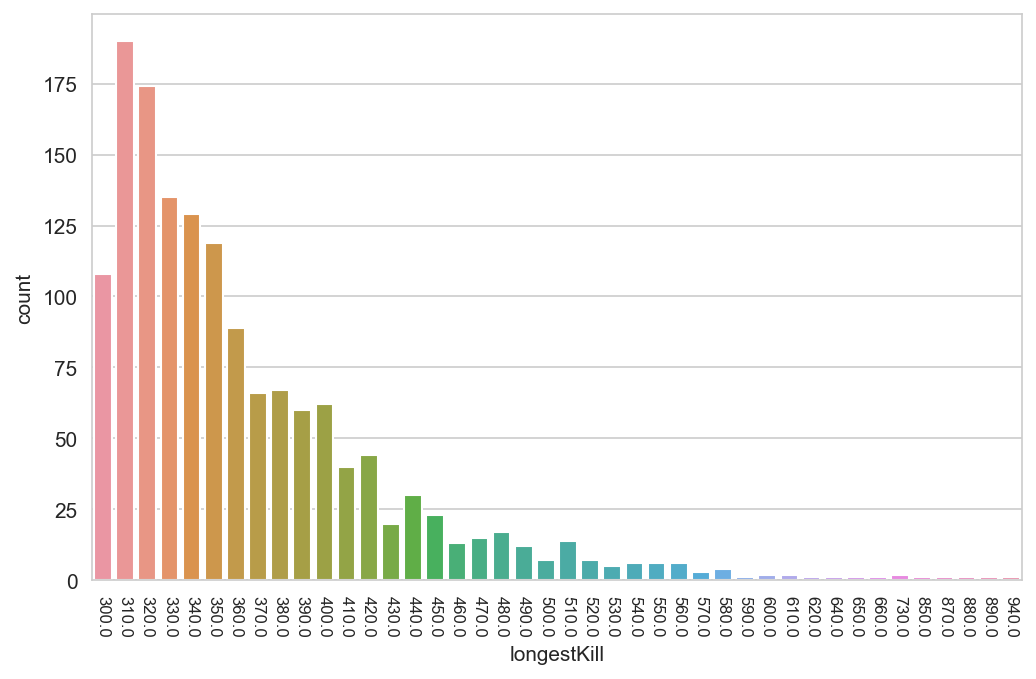

In [14]:
create_fig()
sns.countplot(np.round(df[df['longestKill'] > 300]['longestKill'], -1))
plt.xticks(rotation=-90, size=8)

## heal & boost

In [15]:
df['heals'].describe(), df['boosts'].describe()

(count    536743.000000
 mean          1.009662
 std           2.383460
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           1.000000
 max          63.000000
 Name: heals, dtype: float64, count    536743.000000
 mean          1.058956
 std           1.791546
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           2.000000
 max          28.000000
 Name: boosts, dtype: float64)

In [16]:
df[df['heals'] > 10]['heals'].value_counts().sort_index()

11    1322
12     888
13     670
14     482
15     448
16     352
17     281
18     219
19     156
20     207
21     148
22     148
23     102
24      76
25      54
26      61
27      58
28      41
29      26
30      31
31      29
32      28
33      18
34       8
35      11
36       8
37      14
38       9
39       7
40       9
41       5
42       3
43       1
44       5
45       6
46       3
47       2
48       4
49       2
50       1
52       1
54       1
55       1
56       1
57       1
63       1
Name: heals, dtype: int64

In [17]:
df[df['boosts'] > 5]['boosts'].value_counts().sort_index()

6     8980
7     5415
8     3018
9     1560
10     824
11     372
12     170
13      70
14      34
15      11
16       8
17       1
18       6
19       1
20       1
21       2
22       1
24       1
28       1
Name: boosts, dtype: int64

## Kill streaks

In [18]:
df['killStreaks'].describe()

count    536743.000000
mean          0.482456
std           0.556402
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: killStreaks, dtype: float64

In [19]:
df['killStreaks'].value_counts()

0    292785
1    229943
2     13121
3       812
4        76
5         6
Name: killStreaks, dtype: int64

## จำนวนคนเล่นในแต่ละแมทช์

In [20]:
df['matchId'].unique().shape

(5678,)

In [21]:
player_per_match = df.groupby(['matchId']).count()['Id']

Text(0.5, 0, 'player in match')

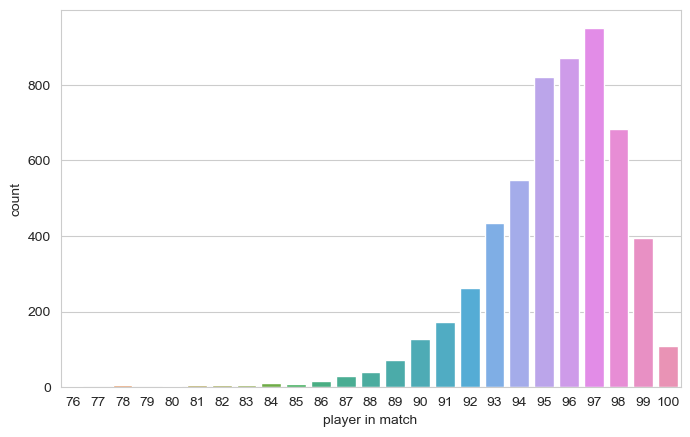

In [22]:
create_fig(dpi=100)
sns.countplot(player_per_match[player_per_match >= 75])
plt.xlabel('player in match')

Text(0.5, 0, 'maxPlace')

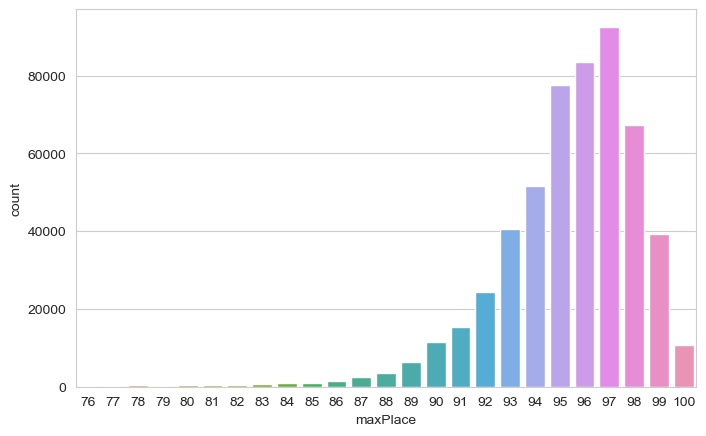

In [23]:
create_fig(dpi=100)
col = 'maxPlace'
sns.countplot(df[df[col] >= 75][col])
plt.xlabel(col)

Text(0.5, 0, 'numGroups')

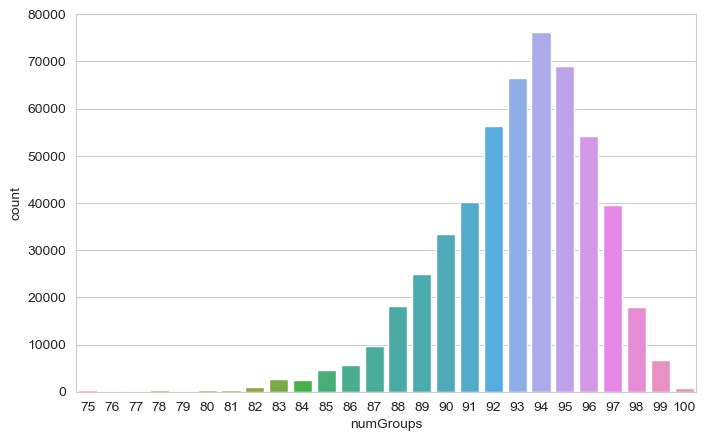

In [24]:
create_fig(dpi=100)
col = 'numGroups'
sns.countplot(df[df[col] >= 75][col])
plt.xlabel(col)

# ...
# add columns
# ...

## Headshot Rate

In [25]:
df['headshotRate'] = df['headshotKills'] / df['kills']
df['headshotRate'].fillna(0, inplace=True)

In [26]:
df['headshotRate'].describe()

count    536743.000000
mean          0.115427
std           0.275431
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: headshotRate, dtype: float64

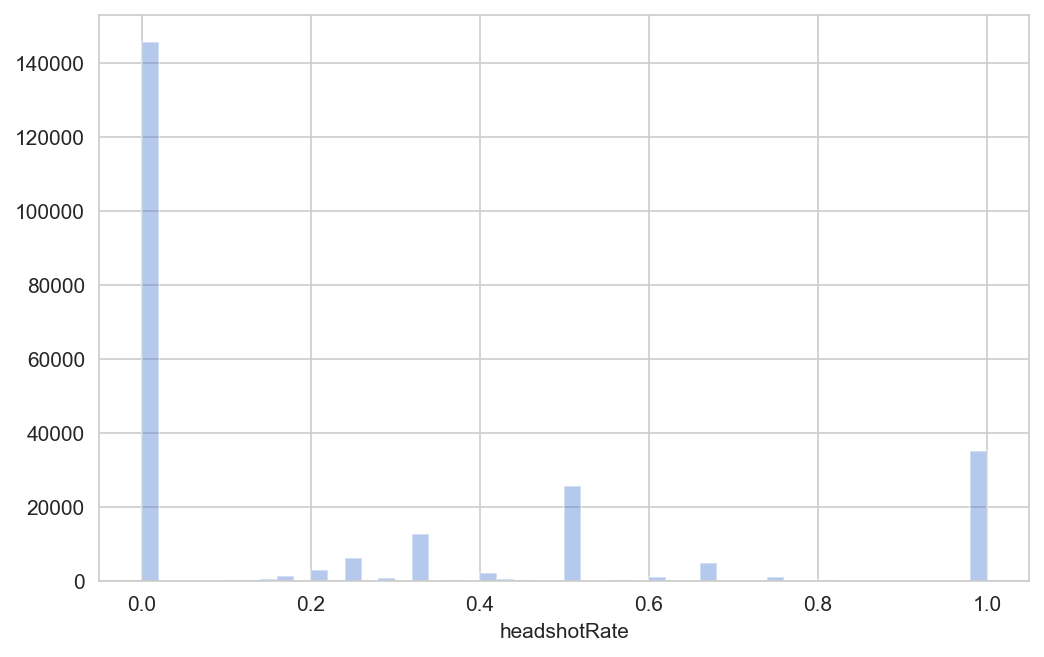

In [27]:
create_fig()
sns.distplot(df[df['kills'] > 0]['headshotRate'], kde=False)

## Total distance

In [28]:
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

## Item used

In [29]:
df['itemUsed'] = df['heals'] + df['boosts']

## Switch winPlacePerc to last columns

In [30]:
win_place = df.pop('winPlacePerc')

In [31]:
df['winPlacePerc'] = win_place
df

,Id,groupId,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotRate,totalDistance,itemUsed,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,45,0,...,0.00,0,0,49.75,2,0,0.00,49.75,0,0.1875
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,48,1000,...,0.00,0,0,1089.00,6,1500,0.00,3093.00,0,0.7368
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,1,5,5,986,...,76.84,0,0,2050.00,6,1462,0.25,3354.84,6,0.8750
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,12,13,0,...,15.29,0,0,1787.00,3,0,0.00,4169.29,15,0.8211
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,37,0,...,0.00,0,0,270.70,1,0,0.00,270.70,0,0.3474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446946,f1aca3f5aeafd8,2c6765c0fc6d77,84d7e32c95913a,0,0,0.000,0,0,53,0,...,0.00,0,0,2591.00,7,0,0.00,2591.00,0,0.7292
4446950,d05b0c4b2ff311,8248fa2552457b,88c002b589d411,0,0,203.500,0,0,32,0,...,0.00,0,0,1559.00,5,0,0.00,1559.00,0,0.5000
4446954,894c01c8e4524f,c33e793af077f9,deb3a91c03d0f3,0,0,30.100,0,0,58,1007,...,0.00,0,0,2146.00,6,1502,0.00,2146.00,0,0.5306
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.680,0,0,89,0,...,0.00,0,0,40.25,1,0,0.00,40.25,0,0.0842


# ...
# Drop anomaly again
# ...

## ยิงแม่นเกินไป ?

In [32]:
headshot_kill5 = df[(df['headshotRate'] == 1) & (df['kills'] > 5)]
headshot_kill5[['kills', 'headshotKills', 'totalDistance', 'itemUsed', 'longestKill', 'winPlacePerc']]

,kills,headshotKills,totalDistance,itemUsed,longestKill,winPlacePerc
45447,6,6,4403.000,6,394.50,0.9896
393284,6,6,2580.000,6,230.50,0.8587
494625,6,6,3270.000,11,131.50,0.9691
521876,6,6,2463.000,9,95.69,1.0000
708136,9,9,5208.360,6,200.60,1.0000
1005804,6,6,2462.000,9,64.03,0.8539
1570180,7,7,3112.000,3,355.10,0.9451
1591047,9,9,3521.000,8,307.10,1.0000
1699765,7,7,3392.160,10,76.42,0.9468
1843669,9,9,2326.000,3,236.20,0.9792


In [33]:
df.drop(headshot_kill5.index, inplace=True)

## camper hack ?

In [34]:
df['totalDistance'].describe()

count    536723.000000
mean       1353.204399
std        1875.390815
min           0.000000
25%          98.255000
50%         498.200000
75%        2038.000000
max       41270.100000
Name: totalDistance, dtype: float64

In [35]:
df[(df['totalDistance'] < 2000) & df['kills'] > 5]

,Id,groupId,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotRate,totalDistance,itemUsed,winPlacePerc


# save cleaned dataframe

In [36]:
df.to_csv("./data/solofpp_train_clean.csv", index=False)

# ...
# Visualize
# ...

## Kill & winner

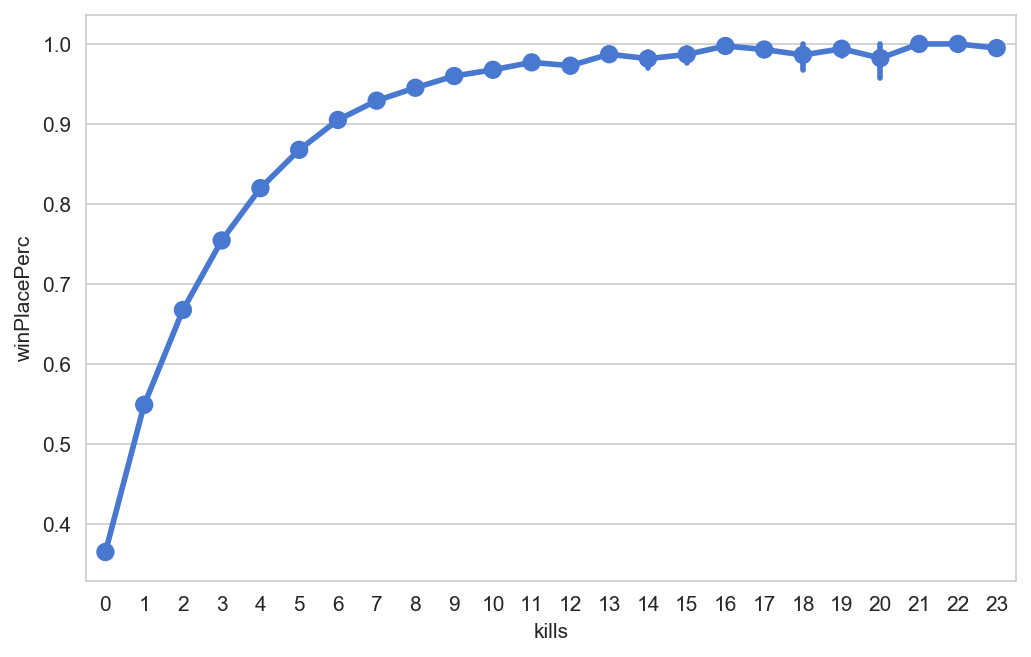

In [37]:
create_fig()
sns.pointplot(x='kills', y='winPlacePerc', data=df)

Text(0, 0.5, 'winPlacePerc')

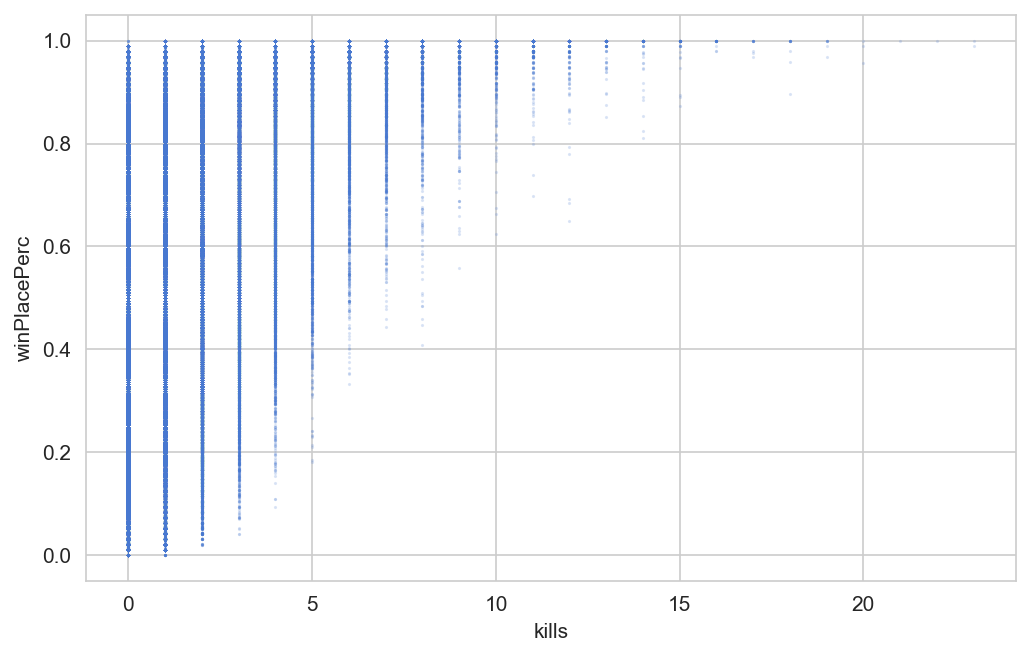

In [38]:
create_fig()
plt.plot(df['kills'], df['winPlacePerc'], 'o', alpha=0.2, markersize=0.5)
plt.xlabel('kills')
plt.ylabel('winPlacePerc')

<Figure size 1200x750 with 0 Axes>

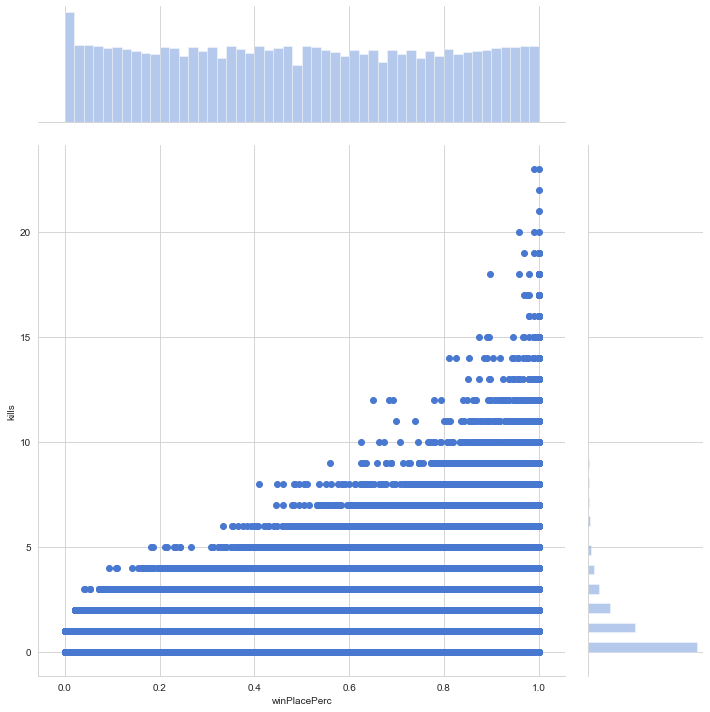

In [39]:
create_fig()
sns.jointplot(x='winPlacePerc', y='kills', data=df, height=10, ratio=4)

c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


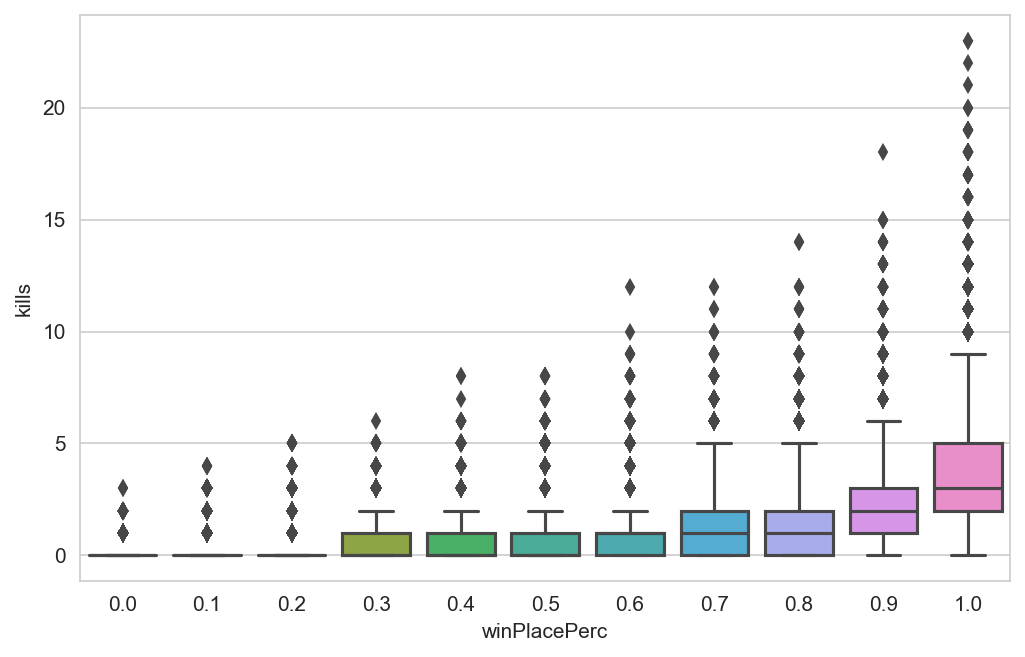

In [40]:
boxplot_killwin_df = df[['kills', 'winPlacePerc']]
boxplot_killwin_df['winPlacePerc'] = np.round(boxplot_killwin_df['winPlacePerc'], 1)

create_fig()
sns.boxplot(x='winPlacePerc', y='kills', data=boxplot_killwin_df)

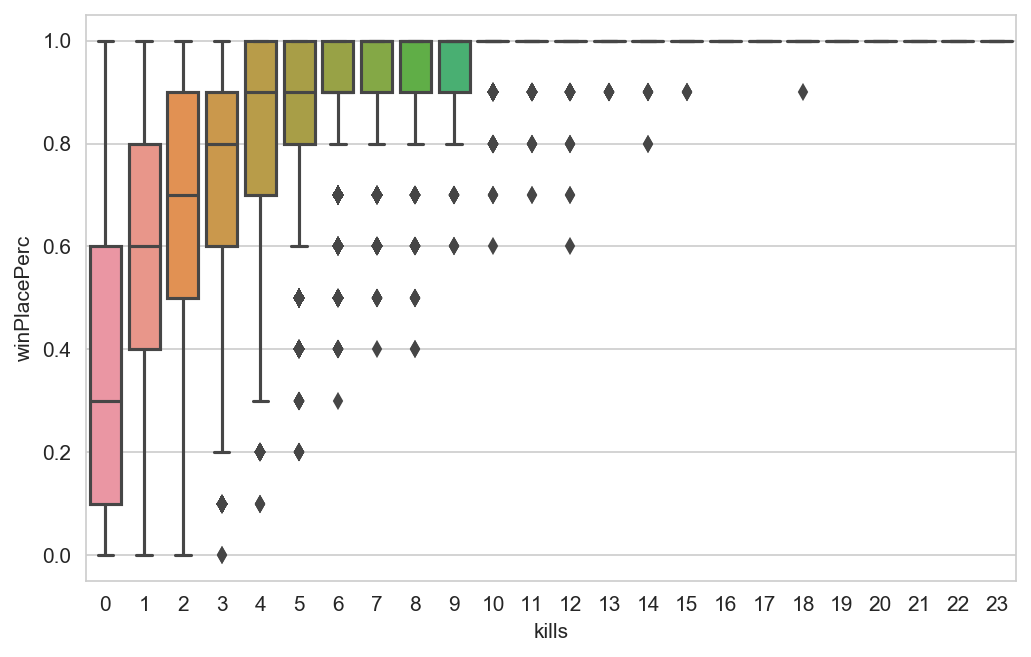

In [41]:
create_fig()
sns.boxplot(x='kills', y='winPlacePerc', data=boxplot_killwin_df)

c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


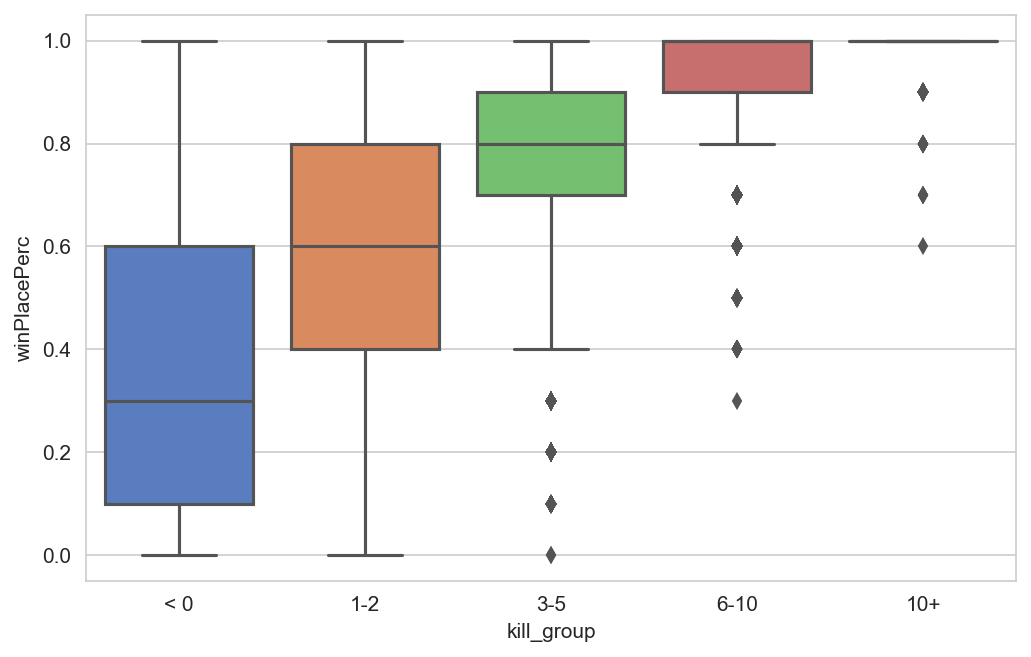

In [42]:
boxplot_killwin_df['kill_group'] = pd.cut(boxplot_killwin_df['kills'], [-1, 0, 2, 5, 10, 25], labels=['< 0', '1-2', '3-5', '6-10', '10+'])
create_fig()
sns.boxplot(x='kill_group', y='winPlacePerc', data=boxplot_killwin_df)

> จะเห็นว่า กลุ่มที่ kill เยอะๆ ค่า med % win มากขึ้นด้วย -> Kill เยอะ โอกาสชนะเยอะ

## heal boost & winner

Text(0.5, 0, 'Number of item')

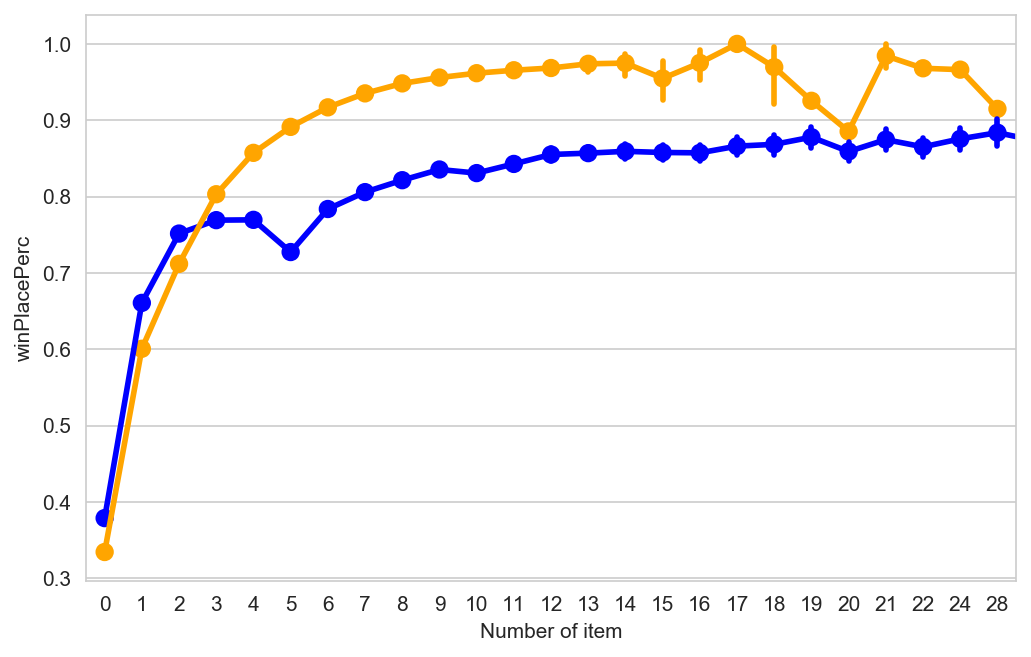

In [43]:
create_fig()
sns.pointplot(x='heals', y='winPlacePerc', data=df, color='blue', label='heal')
sns.pointplot(x='boosts', y='winPlacePerc', data=df, color='orange', label='boost')
plt.xlabel('Number of item')

## Correlation

In [44]:
df_corr = df.corr()

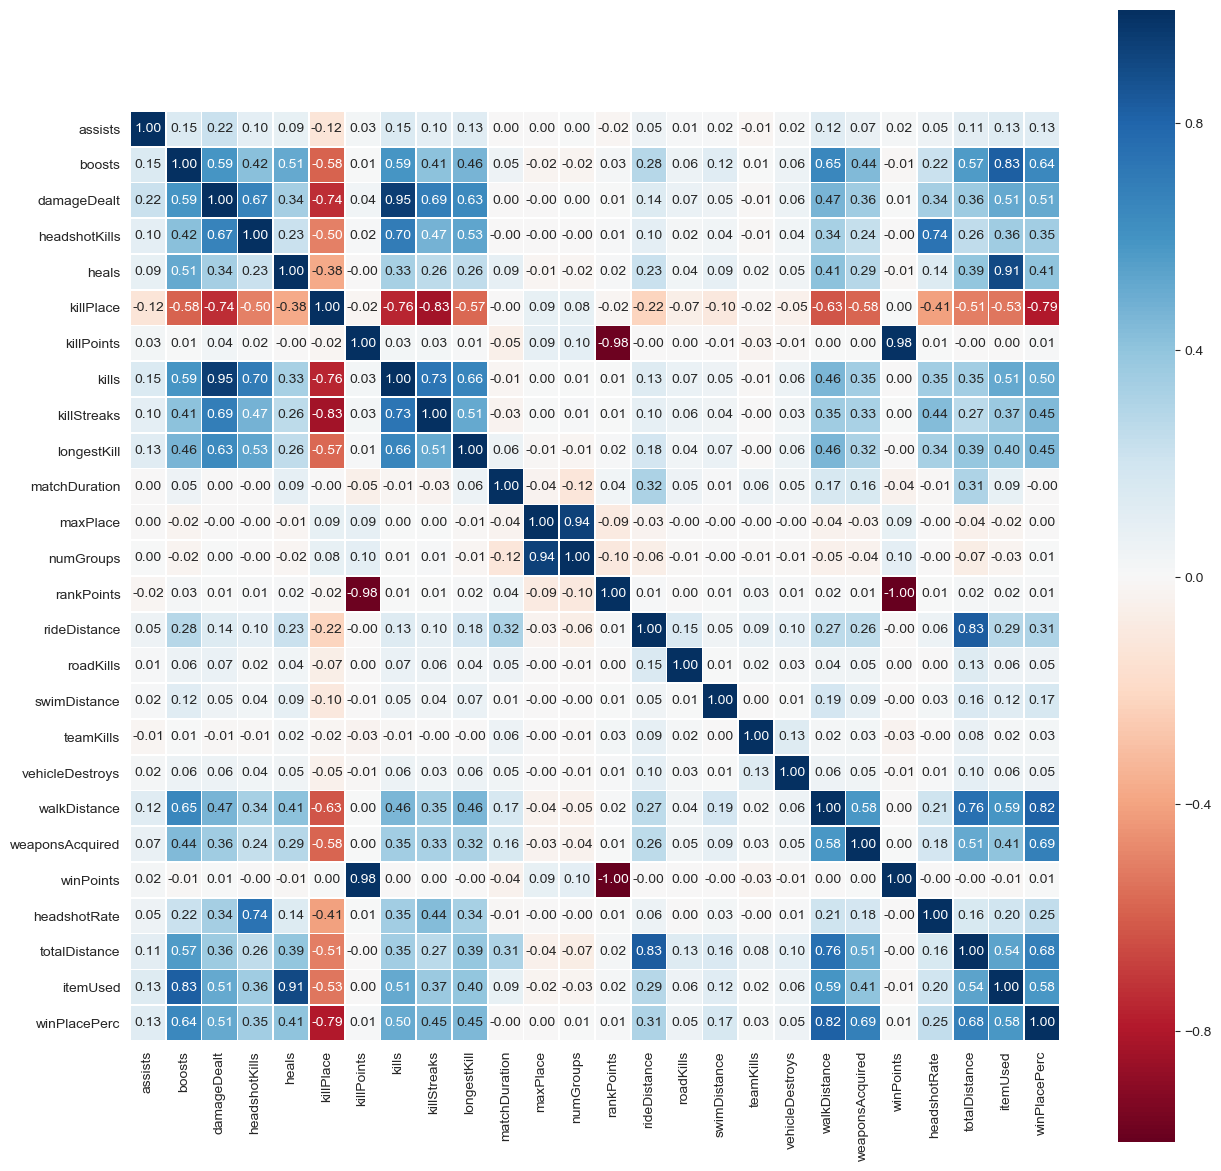

In [45]:
f,ax = plt.subplots(figsize=(15, 15), dpi=100)
sns.heatmap(df_corr, annot=True, fmt=".2f", ax=ax, linewidth=0.5, square=True, cmap='RdBu')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.show()

In [46]:
select_corr_cols = df_corr[np.abs(df_corr) > 0.5]['winPlacePerc'].dropna().index

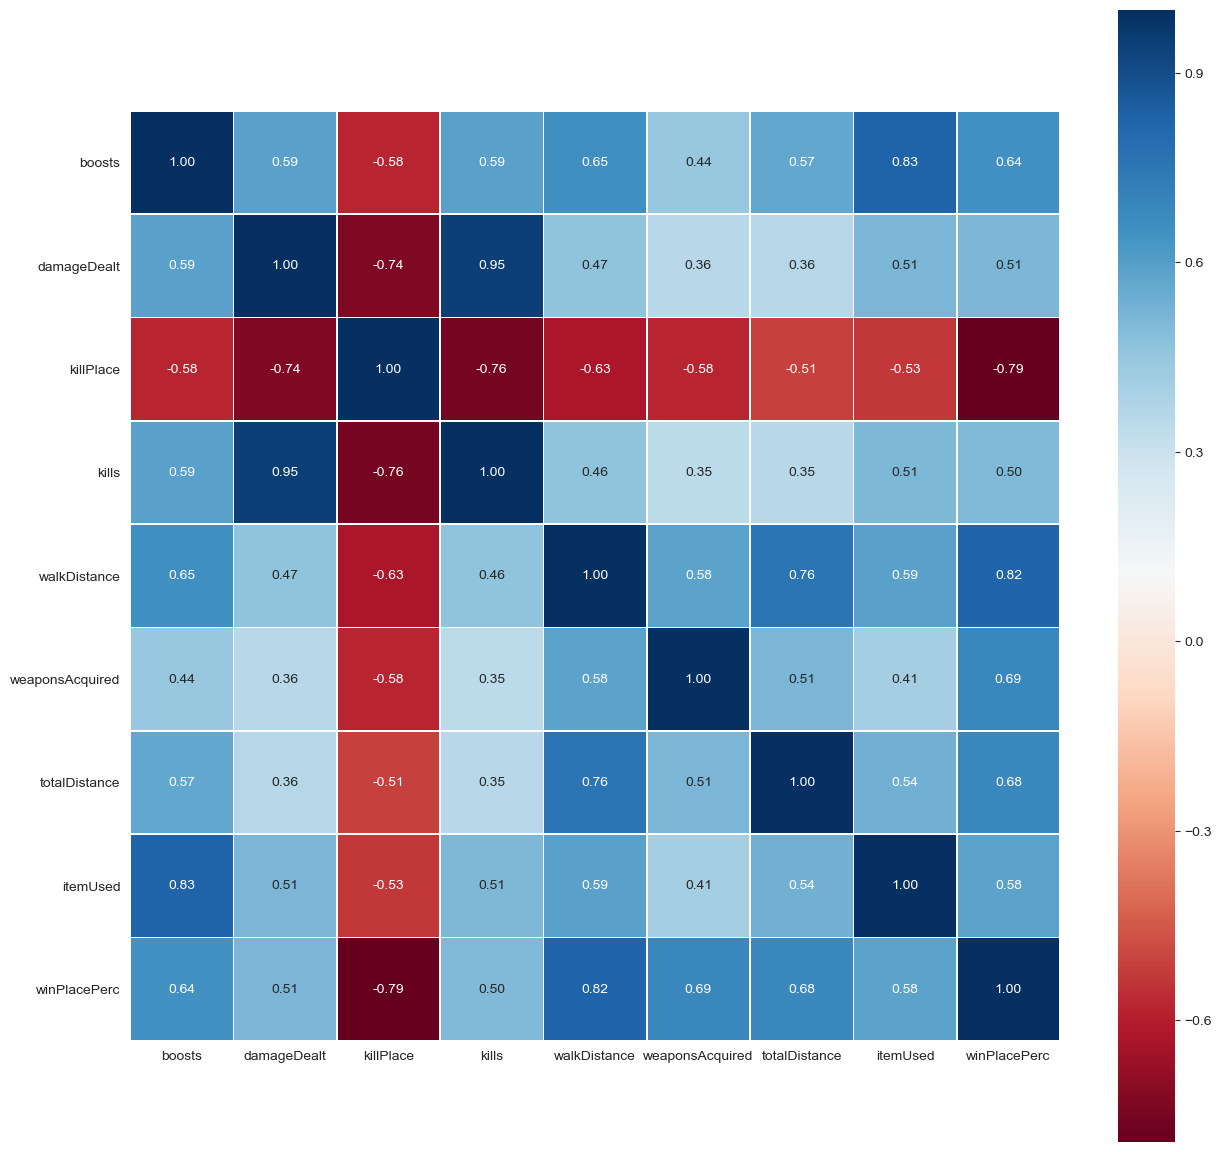

In [47]:
f,ax = plt.subplots(figsize=(15, 15), dpi=100)
sns.heatmap(df_corr.loc[select_corr_cols.tolist(), select_corr_cols], annot=True, fmt=".2f", ax=ax, linewidth=0.5, square=True, cmap='RdBu')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.show()

> เลือกเฉพาะ corr > 0.5, แสดงถึงมี**ความสัมพันธ์เชิงเส้น**กันมาก

In [48]:
df_corr

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotRate,totalDistance,itemUsed,winPlacePerc
assists,1.000000,0.146596,0.222026,0.103126,0.087911,-0.123125,0.026400,0.145595,0.096153,0.125872,...,0.017377,-0.013836,0.023335,0.122855,0.074339,0.019750,0.050563,0.107596,0.129748,0.126453
boosts,0.146596,1.000000,0.591734,0.418850,0.509614,-0.582884,0.005600,0.593299,0.412313,0.462381,...,0.124044,0.006801,0.063600,0.653481,0.440177,-0.007840,0.224806,0.568920,0.826075,0.643535
damageDealt,0.222026,0.591734,1.000000,0.668162,0.338287,-0.735812,0.037884,0.947831,0.689091,0.634624,...,0.049744,-0.010287,0.064668,0.465498,0.355175,0.006573,0.338378,0.362185,0.512875,0.511787
headshotKills,0.103126,0.418850,0.668162,1.000000,0.227366,-0.499182,0.016229,0.699604,0.470107,0.526668,...,0.038718,-0.005949,0.038515,0.335659,0.243578,-0.003916,0.740217,0.258545,0.355115,0.351636
heals,0.087911,0.509614,0.338287,0.227366,1.000000,-0.375459,-0.001385,0.331927,0.262297,0.258803,...,0.089463,0.023369,0.046036,0.413284,0.287974,-0.007814,0.139103,0.393214,0.905869,0.405267
killPlace,-0.123125,-0.582884,-0.735812,-0.499182,-0.375459,1.000000,-0.015948,-0.757573,-0.834902,-0.570540,...,-0.104067,-0.016106,-0.051163,-0.627271,-0.577858,0.002836,-0.409645,-0.508716,-0.532866,-0.793097
killPoints,0.026400,0.005600,0.037884,0.016229,-0.001385,-0.015948,1.000000,0.032372,0.028478,0.012825,...,-0.005041,-0.030186,-0.007911,0.002486,0.003193,0.984619,0.006139,-0.001551,0.001850,0.011125
kills,0.145595,0.593299,0.947831,0.699604,0.331927,-0.757573,0.032372,1.000000,0.729016,0.657694,...,0.052968,-0.009144,0.061625,0.460818,0.347149,0.002122,0.348354,0.351934,0.509480,0.501417
killStreaks,0.096153,0.412313,0.689091,0.470107,0.262297,-0.834902,0.028478,0.729016,1.000000,0.514986,...,0.042721,-0.004467,0.033924,0.353784,0.327058,0.002702,0.438685,0.268348,0.374777,0.446236
longestKill,0.125872,0.462381,0.634624,0.526668,0.258803,-0.570540,0.012825,0.657694,0.514986,1.000000,...,0.065055,-0.002065,0.061748,0.456471,0.317573,-0.004606,0.337308,0.386176,0.397135,0.447444


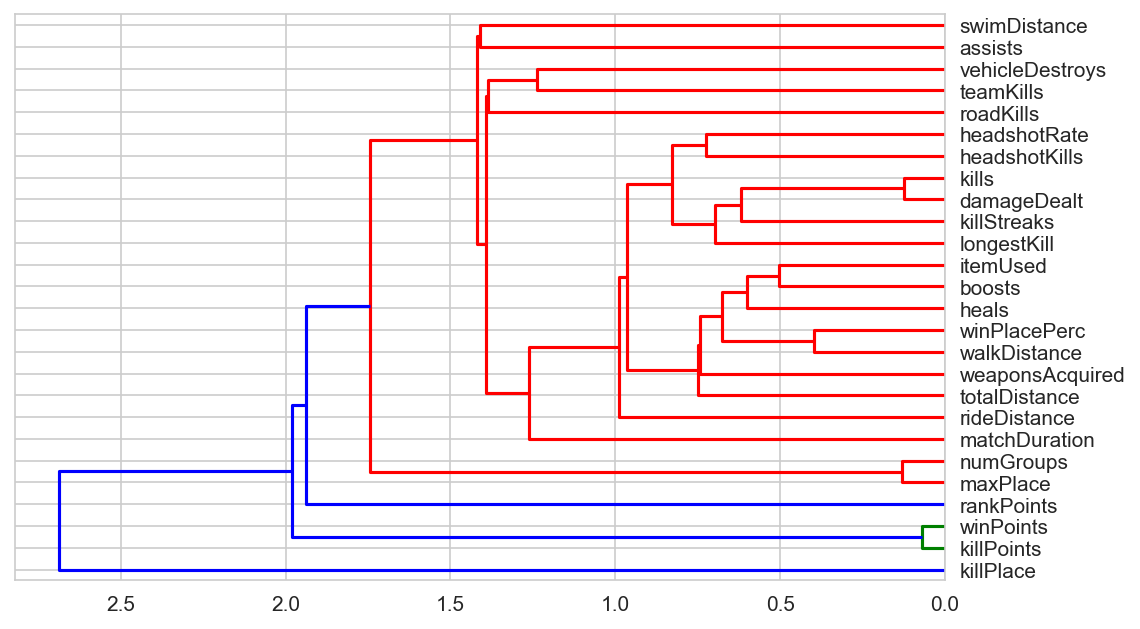

In [49]:
link = linkage(df_corr)
create_fig()
dendrogram(link, labels=df_corr.index, orientation="left")
plt.show()